<a href="https://colab.research.google.com/github/carloosarthuur/Atividade-2/blob/main/Letra_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import math
import time
import pandas as pd
import numpy as np

# Método da Bissecção

### 1. Teoria
Método de isolamento de raízes, simples e robusto.  
**Base:** Teorema de Bolzano.

- **Condição:** $f(x)$ contínua em $[a,b]$ e $f(a)\cdot f(b) < 0$.
- **Conclusão:** Existe pelo menos uma raiz real no intervalo $[a,b]$.

### 2. Algoritmo
O método baseia-se na redução sucessiva do intervalo até atingir a precisão $\varepsilon$.

1. Calcular o ponto médio:  
   $$
   x = \frac{a+b}{2}
   $$
2. Verificar a troca de sinal entre $f(a)$, $f(x)$ e $f(b)$.
3. Selecionar o subintervalo que contém a raiz.
4. **Repetir** até que o comprimento do intervalo seja menor que $\varepsilon$.

### 3. Representação gráfica
Redução iterativa do intervalo $[a,b]$, evidenciando a convergência para a raiz.


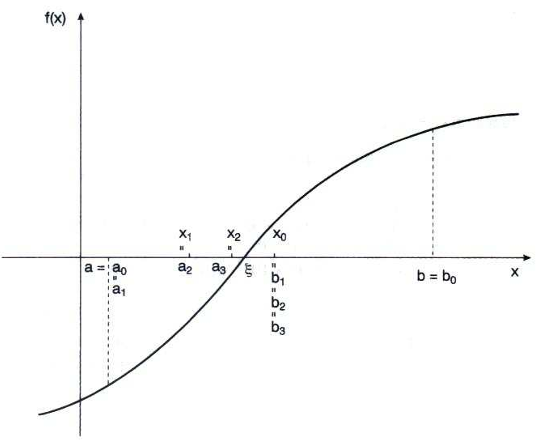

In [59]:
def metodo_bisseccao(f, a, b, epsilon, max_iter=100): # Passo 1: Dados iniciais
    ainicio, binicio = a, b

    start = time.perf_counter()

    # Passo 2: Teste de intervalo inicial
    if (b - a) < epsilon:
        end = time.perf_counter()
        return {
            "Método": "Bissecção", "Dados Iniciais": f"[{a}, {b}]",
            "Raiz": a, "f(x)": f(a), "Erro": b - a, "Iterações": 0,
            "Tempo Total": end - start, "Tempo/Iter": 0
        }

    k = 1 # Passo 3
    M = f(a) # Passo 4

    while k <= max_iter:
        x = (a + b) / 2 # Passo 5

        if M * f(x) > 0: # Passo 6
            a = x
            M = f(x)
        else:
            b = x # Passo 7

        if (b - a) < epsilon: # Passo 8
            end = time.perf_counter()
            t_total = end - start
            return {
                "Método": "Bissecção", "Dados Iniciais": f"[{ainicio}, {binicio}]",
                "Raiz": x, "f(x)": f(x), "Erro": b - a, "Iterações": k,
                "Tempo Total": t_total, "Tempo/Iter": t_total / k
            }

        k = k + 1 # Passo 9

    return None

# Método da Posição Falsa

O Método da Posição Falsa é uma melhoria em relação ao método da Bissecção, pois utiliza uma escolha mais eficiente do ponto de teste. Em vez do ponto médio do intervalo, calcula-se um ponto $x$ por meio de uma **média ponderada** entre $a$ e $b$, considerando os valores de $|f(a)|$ e $|f(b)|$ como pesos.

Do ponto de vista geométrico, o ponto $x$ corresponde à interseção da reta secante que passa pelos pontos $(a, f(a))$ e $(b, f(b))$ com o eixo $x$. Em geral, esse critério permite uma convergência mais rápida, principalmente quando uma das extremidades do intervalo está significativamente mais próxima da raiz.

### Representação gráfica
Reta secante interceptando o eixo das abscissas.


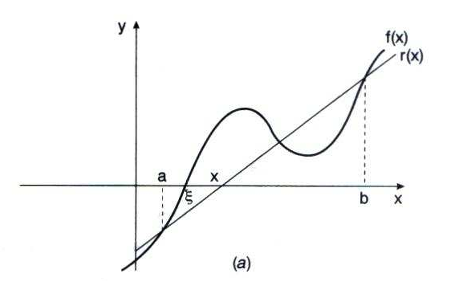

In [60]:
def metodo_posicao_falsa(f, a, b, eps1, eps2, max_iter=100): # Passo 1: Dados iniciais
    start = time.perf_counter()
    a_old, b_old = a, b

    # Passo 2
    if (b - a) < eps1:
        end = time.perf_counter()
        return {"Método": "Posição Falsa", "Dados Iniciais": f"[{a_old}, {b_old}]", "Raiz": a, "f(x)": f(a), "Erro": b-a, "Iterações": 0, "Tempo Total": end-start, "Tempo/Iter": 0}


    if abs(f(a)) < eps2:
        return {"Método": "Posição Falsa", "Dados Iniciais": f"[{a_old}, {b_old}]", "Raiz": a, "f(x)": f(a), "Erro": 0, "Iterações": 0, "Tempo Total": time.perf_counter()-start, "Tempo/Iter": 0}
    if abs(f(b)) < eps2:
        return {"Método": "Posição Falsa", "Dados Iniciais": f"[{a_old}, {b_old}]", "Raiz": b, "f(x)": f(b), "Erro": 0, "Iterações": 0, "Tempo Total": time.perf_counter()-start, "Tempo/Iter": 0}

    k = 1 # Passo 3

    while k <= max_iter:
        M = f(a) # Passo 4
        x = (a * f(b) - b * f(a)) / (f(b) - f(a)) # Passo 5

        # Passo 6
        if abs(f(x)) < eps2:
            end = time.perf_counter()
            t_total = end - start
            return {"Método": "Posição Falsa", "Dados Iniciais": f"[{a_old}, {b_old}]", "Raiz": x, "f(x)": f(x), "Erro": abs(f(x)), "Iterações": k, "Tempo Total": t_total, "Tempo/Iter": t_total/k}


        if M * f(x) > 0:
            a = x # Passo 7
        else:
            b = x # Passo 8

        # Passo 9
        if (b - a) < eps1:
            end = time.perf_counter()
            t_total = end - start
            return {"Método": "Posição Falsa", "Dados Iniciais": f"[{a_old}, {b_old}]", "Raiz": x, "f(x)": f(x), "Erro": b-a, "Iterações": k, "Tempo Total": t_total, "Tempo/Iter": t_total/k}

        k = k + 1 # Passo 10

    return None

# Método do Ponto Fixo (MPF)
O Método do Ponto Fixo consiste em reescrever a equação original $f(x) = 0$ na forma equivalente
$$
x = \varphi(x),
$$
onde $\varphi(x)$ é chamada de **função de iteração**.

A partir de uma aproximação inicial $x_0$, constrói-se a sequência iterativa
$$
x_{k+1} = \varphi(x_k).
$$
Assim, o problema de encontrar a raiz de $f(x)$ é convertido no problema de determinar o ponto fixo, isto é, o ponto em que a curva $y = \varphi(x)$ intersecta a reta identidade $y = x$.

A convergência do método depende do comportamento da derivada de $\varphi(x)$, sendo garantida quando
$$
|\varphi'(x)| < 1
$$
em uma vizinhança da raiz.

### Representação gráfica
Processo iterativo (em forma de escada ou espiral) convergindo para o ponto de interseção.


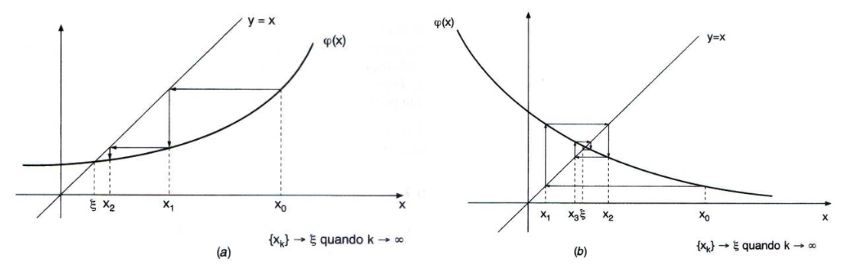

In [61]:
def metodo_ponto_fixo(f, phi, x0, eps1, eps2, max_iter=100): # Passo 1: Dados iniciais
    start = time.perf_counter()

    # Passo 2
    if abs(f(x0)) < eps1:
        end = time.perf_counter()
        return {
            "Método": "MPF", "Dados Iniciais": f"x0={x0}",
            "Raiz": x0, "f(x)": f(x0), "Erro": 0,
            "Iterações": 0, "Tempo Total": end - start, "Tempo/Iter": 0
        }

    k = 1 # Passo 3

    while k <= max_iter:
        x1 = phi(x0) # Passo 4

        # Passo 5
        if abs(f(x1)) < eps1 or abs(x1 - x0) < eps2:
            end = time.perf_counter()
            t_total = end - start
            return {
                "Método": "MPF", "Dados Iniciais": f"x0={x0}",
                "Raiz": x1, "f(x)": f(x1), "Erro": abs(x1 - x0),
                "Iterações": k, "Tempo Total": t_total, "Tempo/Iter": t_total/k
            }
        x0 = x1 # Passo 6
        k = k + 1 # Passo 7

    return None

# Método de Newton-Raphson

### Teoria
O Método de Newton-Raphson acelera a convergência utilizando a derivada da função. A função de iteração é definida por
$$
\varphi(x) = x - \frac{f(x)}{f'(x)}.
$$

A partir de uma aproximação inicial $x_k$, aproxima-se a função $f(x)$ por sua **reta tangente** nesse ponto. A interseção da tangente com o eixo $x$ fornece a próxima aproximação
$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

O método apresenta **convergência quadrática**, desde que o chute inicial esteja suficientemente próximo da raiz e que $f'(x)$ não se anule na vizinhança considerada.

### Representação gráfica
Reta tangente conduzindo as iterações em direção à raiz.


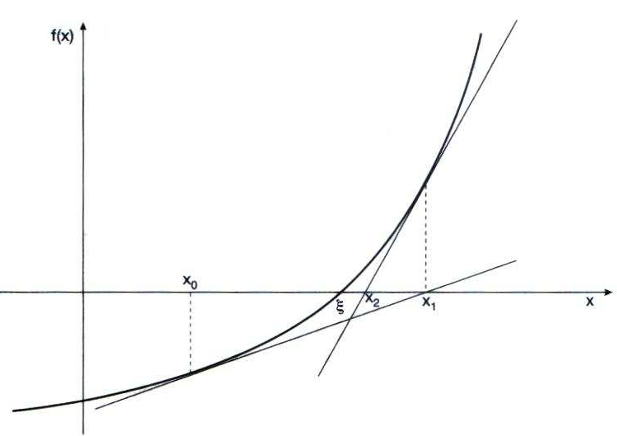

In [62]:
def metodo_newton(f, df, x0, eps1, eps2, max_iter=100): # Passo 1: Dados iniciais
    start = time.perf_counter()
    x_inicial = x0

    # Passo 2
    if abs(f(x0)) < eps1:
        end = time.perf_counter()
        return {
            "Método": "Newton", "Dados Iniciais": f"x0={x_inicial}",
            "Raiz": x0, "f(x)": f(x0), "Erro": 0,
            "Iterações": 0, "Tempo Total": end-start, "Tempo/Iter": 0
        }

    k = 1 # Passo 3

    while k <= max_iter:
        x1 = x0 - f(x0) / df(x0) # Passo 4

        # Passo 5
        if abs(f(x1)) < eps1 or abs(x1 - x0) < eps2:
            end = time.perf_counter()
            t_total = end - start
            return {
                "Método": "Newton", "Dados Iniciais": f"x0={x_inicial}",
                "Raiz": x1, "f(x)": f(x1), "Erro": abs(x1 - x0),
                "Iterações": k, "Tempo Total": t_total, "Tempo/Iter": t_total/k
            }


        x0 = x1 # Passo 6
        k = k + 1 # Passo 7

    return None

# Método da Secante

### Teoria
O Método da Secante é uma alternativa ao método de Newton quando o cálculo da derivada $f'(x)$ é difícil ou custoso. Ele substitui a derivada pelo quociente das diferenças finitas:
$$f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$$
Por isso, ele necessita de **dois pontos iniciais** ($x_0$ e $x_1$). Geometricamente, ele usa a reta secante que passa pelos dois últimos pontos calculados para estimar o próximo.

### Representação Gráfica
Geometria da secante cruzando o eixo x:

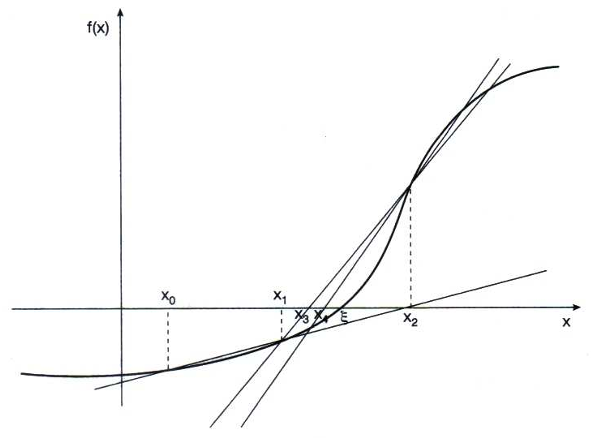

In [63]:
def metodo_secante(f, x0, x1, eps1, eps2, max_iter=100): #Passo 1: Dados iniciais
    start = time.perf_counter()

    # Passo 2
    if abs(f(x0)) < eps1:
        return {"Método": "Secante", "Dados Iniciais": f"x0={x0}", "Raiz": x0, "f(x)": f(x0), "Erro": 0, "Iterações": 0, "Tempo Total": time.perf_counter()-start, "Tempo/Iter": 0}

    # Passo 3
    if abs(f(x1)) < eps1 or abs(x1 - x0) < eps2:
        return {"Método": "Secante", "Dados Iniciais": f"x1={x1}", "Raiz": x1, "f(x)": f(x1), "Erro": abs(x1-x0), "Iterações": 0, "Tempo Total": time.perf_counter()-start, "Tempo/Iter": 0}

    k = 1 # Passo 4
    curr_x0 = x0
    curr_x1 = x1

    while k <= max_iter:
        # Passo 5
        denom = f(curr_x1) - f(curr_x0)
        if denom == 0: break # Proteção para divisão por zero
        x2 = curr_x1 - (f(curr_x1) / denom) * (curr_x1 - curr_x0)

        # Passo 6
        if abs(f(x2)) < eps1 or abs(x2 - curr_x1) < eps2:
            end = time.perf_counter()
            t_total = end - start
            return {
                "Método": "Secante", "Dados Iniciais": f"x0={x0}, x1={x1}",
                "Raiz": x2, "f(x)": f(x2), "Erro": abs(x2 - curr_x1),
                "Iterações": k, "Tempo Total": t_total, "Tempo/Iter": t_total/k
            }

        curr_x0 = curr_x1 # Passo 7
        curr_x1 = x2
        k = k + 1 # Passo 8

    return None

In [64]:
# f(x) = e^(-x^2) - cos(x)
# f'(x) = -2x*e^(-x^2) + sin(x)
# phi(x) = cos(x) - e^(-x^2) + x
def f18(x):
    return math.exp(-x**2) - math.cos(x)

def df18(x):
    return -2*x*math.exp(-x**2) + math.sin(x)

def phi18(x):
    return math.cos(x) - math.exp(-x**2) + x

# f(x) = x^3 - x - 1
# f'(x) = 3x^2 - 1
# phi(x) = (x + 1)^(1/3)
def f19(x):
    return x**3 - x - 1

def df19(x):
    return 3*x**2 - 1

def phi19(x):
    return (x + 1)**(1/3)

# f(x) = 4sin(x) - e^x
# f'(x) = 4cos(x) - e^x
# phi(x) = x - 2sin(x) + 0.5e^x
def f20(x):
    return 4*math.sin(x) - math.exp(x)

def df20(x):
    return 4*math.cos(x) - math.exp(x)

def phi20(x):
    return x - 2*math.sin(x) + 0.5*math.exp(x)

# f(x) = x*log10(x) - 1
# f'(x) = log10(x) + x*(1/(x*ln(10))) = f'(x) = log10(x) + 1/ln(10)
# phi(x) = x - 1.3*(x*log10(x) - 1)
def f21(x):
    return x * math.log10(x) - 1

def df21(x): #
    return math.log10(x) + (1 / math.log(10))

def phi21(x):
    return x - 1.3 * (x * math.log10(x) - 1)

# f(x) = x^3 - 3.5x^2 + 4x - 1.5
# f'(x) = 3x^2 - 7x + 4
def f22(x):
    return x**3 - 3.5*x**2 + 4*x - 1.5

def df22(x):
    return 3*x**2 - 7*x + 4
o

In [65]:
resultados_ex18 = []
resultados_ex19 = []
resultados_ex20 = []
resultados_ex21 = []
resultados_ex22 = []

# EXEMPLO 18: f(x) = e^(-x^2) - cos(x)

eps = 1e-4
# 1. Bissecção [1, 2]
res = metodo_bisseccao(f18, 1, 2, eps)
if res: resultados_ex18.append(res)

# 2. Posição Falsa [1, 2]
res = metodo_posicao_falsa(f18, 1, 2, eps, eps)
if res: resultados_ex18.append(res)

# 3. MPF x0 = 1.5
res = metodo_ponto_fixo(f18, phi18, 1.5, eps, eps)
if res: resultados_ex18.append(res)

# 4. Newton x0 = 1.5
res = metodo_newton(f18, df18, 1.5, eps, eps)
if res: resultados_ex18.append(res)

# 5. Secante x0=1, x1=2
res = metodo_secante(f18, 1, 2, eps, eps)
if res: resultados_ex18.append(res)


# EXEMPLO 19: f(x) = x^3 - x - 1
eps = 1e-6
# 1. Bissecção [1, 2]
res = metodo_bisseccao(f19, 1, 2, eps)
if res: resultados_ex19.append(res)

# 2. Posição Falsa [1, 2]
res = metodo_posicao_falsa(f19, 1, 2, eps, eps)
if res: resultados_ex19.append(res)

# 3. MPF x0 = 1
res = metodo_ponto_fixo(f19, phi19, 1, eps, eps)
if res: resultados_ex19.append(res)

# 4. Newton x0 = 0
res = metodo_newton(f19, df19, 0, eps, eps)
if res: resultados_ex19.append(res)

# 5. Secante x0=0, x1=0.5
res = metodo_secante(f19, 0, 0.5, eps, eps)
if res: resultados_ex19.append(res)


# EXEMPLO 20: f(x) = 4sin(x) - e^x
eps = 1e-5

# 1. Bissecção [0, 1]
res = metodo_bisseccao(f20, 0, 1, eps)
if res: resultados_ex20.append(res)

# 2. Posição Falsa [0, 1]
res = metodo_posicao_falsa(f20, 0, 1, eps, eps)
if res: resultados_ex20.append(res)

# 3. MPF x0 = 0.5
res = metodo_ponto_fixo(f20, phi20, 0.5, eps, eps)
if res: resultados_ex20.append(res)

# 4. Newton x0 = 0.5
res = metodo_newton(f20, df20, 0.5, eps, eps)
if res: resultados_ex20.append(res)

# 5. Secante x0=0, x1=1
res = metodo_secante(f20, 0, 1, eps, eps)
if res: resultados_ex20.append(res)


# EXEMPLO 21: f(x) = x*log10(x) - 1
eps = 1e-7

# 1. Bissecção [2, 3]
res = metodo_bisseccao(f21, 2, 3, eps)
if res: resultados_ex21.append(res)

# 2. Posição Falsa [2, 3]
res = metodo_posicao_falsa(f21, 2, 3, eps, eps)
if res: resultados_ex21.append(res)

# 3. MPF x0 = 2.5
res = metodo_ponto_fixo(f21, phi21, 2.5, eps, eps)
if res: resultados_ex21.append(res)

# 4. Newton x0 = 2.5
res = metodo_newton(f21, df21, 2.5, eps, eps)
if res: resultados_ex21.append(res)

# 5. Secante x0=2.3, x1=2.7
res = metodo_secante(f21, 2.3, 2.7, eps, eps)
if res: resultados_ex21.append(res)


# EXEMPLO 22: f(x) = x^3 - 3.5x^2 + 4x - 1.5
eps = 1e-7

# Teste 1: Newton x0 = 0.5
res = metodo_newton(f22, df22, 0.5, eps, eps)
if res:
    res["Método"] = "Newton (Teste 1)"
    resultados_ex22.append(res)

# Teste 2: Newton x0 = 1.33333
res = metodo_newton(f22, df22, 1.33333, eps, eps)
if res:
    res["Método"] = "Newton (Teste 2)"
    resultados_ex22.append(res)

# Teste 3: Newton x0 = 1.33334
res = metodo_newton(f22, df22, 1.33334, eps, eps)
if res:
    res["Método"] = "Newton (Teste 3)"
    resultados_ex22.append(res)

# Teste 4: Bissecção [0.5, 2.0]
res = metodo_bisseccao(f22, 0.5, 2.0, eps)
if res:
    res["Método"] = "Bissecção (Teste 4)"
    resultados_ex22.append(res)


In [66]:
def exibir_tabela(dados, titulo):
    df = pd.DataFrame(dados)
    colunas = ["Método", "Dados Iniciais", "Raiz", "f(x)", "Erro", "Iterações", "Tempo Total", "Tempo/Iter"]
    print(titulo)
    display(df[colunas])

exibir_tabela(resultados_ex18, "Resultados: Exemplo 18")
exibir_tabela(resultados_ex19, "Resultados: Exemplo 19")
exibir_tabela(resultados_ex20, "Resultados: Exemplo 20")
exibir_tabela(resultados_ex21, "Resultados: Exemplo 21")
exibir_tabela(resultados_ex22, "Resultados: Exemplo 22 (Casos Especiais)")

Resultados: Exemplo 18


,Método,Dados Iniciais,Raiz,f(x),Erro,Iterações,Tempo Total,Tempo/Iter
0,Bissecção,"[1, 2]",1.447449,2.192118e-05,0.000061,14,0.000026,0.000002
1,Posição Falsa,"[1, 2]",1.447357,-3.638759e-05,0.000036,6,0.000019,0.000003
2,MPF,x0=1.4477178941812103,1.447525,7.025778e-05,0.000193,6,0.000009,0.000001
3,Newton,x0=1.5,1.447416,1.320436e-06,0.001707,2,0.000008,0.000004
4,Secante,"x0=1, x1=2",1.447413,-5.242250e-07,0.000186,5,0.000012,0.000002


Resultados: Exemplo 19


,Método,Dados Iniciais,Raiz,f(x),Erro,Iterações,Tempo Total,Tempo/Iter
0,Bissecção,"[1, 2]",1.324718,-1.857576e-06,9.536743e-07,20,0.000012,6.195000e-07
1,Posição Falsa,"[1, 2]",1.324718,-8.290661e-07,8.290661e-07,17,0.000027,1.601824e-06
2,MPF,x0=1.324717372435671,1.324718,-4.737265e-07,4.737265e-07,9,0.000007,7.335556e-07
3,Newton,x0=0,1.324718,2.747136e-12,8.313699e-07,21,0.000020,9.297143e-07
4,Secante,"x0=0, x1=0.5",1.324718,-4.340576e-08,1.191661e-05,26,0.000028,1.062461e-06


Resultados: Exemplo 20


,Método,Dados Iniciais,Raiz,f(x),Erro,Iterações,Tempo Total,Tempo/Iter
0,Bissecção,"[0, 1]",0.370552,-1.375500e-05,0.000008,17,0.000021,0.000001
1,Posição Falsa,"[0, 1]",0.370559,1.669806e-06,0.000002,8,0.000017,0.000002
2,MPF,x0=0.3705722577325997,0.370556,-4.519361e-06,0.000016,5,0.000006,0.000001
3,Newton,x0=0.5,0.370558,-2.783496e-08,0.000139,3,0.000005,0.000002
4,Secante,"x0=0, x1=1",0.370558,5.260490e-09,0.000006,7,0.000011,0.000002


Resultados: Exemplo 21


,Método,Dados Iniciais,Raiz,f(x),Erro,Iterações,Tempo Total,Tempo/Iter
0,Bissecção,"[2, 3]",2.506184,1.260012e-08,5.960464e-08,24,0.000015,6.152917e-07
1,Posição Falsa,"[2, 3]",2.506184,-9.927992e-08,9.927992e-08,5,0.000010,1.980400e-06
2,MPF,x0=2.506183850141209,2.506184,2.050827e-08,3.200582e-07,5,0.000005,9.504001e-07
3,Newton,x0=2.5,2.506184,1.378231e-12,3.988137e-06,2,0.000006,2.810000e-06
4,Secante,"x0=2.3, x1=2.7",2.506184,2.915257e-08,8.056093e-05,3,0.000005,1.579333e-06


Resultados: Exemplo 22 (Casos Especiais)


,Método,Dados Iniciais,Raiz,f(x),Erro,Iterações,Tempo Total,Tempo/Iter
0,Newton (Teste 1),x0=0.5,0.999553,-9.993516e-08,4.460737e-04,11,0.000016,1.468818e-06
1,Newton (Teste 2),x0=1.33333,0.999709,-4.236363e-08,2.906571e-04,35,0.000033,9.492000e-07
2,Newton (Teste 3),x0=1.33334,1.500000,1.224126e-09,3.498631e-05,27,0.000022,7.995185e-07
3,Bissecção (Teste 4),"[0.5, 2.0]",1.500000,7.450581e-09,8.940697e-08,24,0.000014,5.798750e-07


# Análise Comparativa dos Resultados

Com base nos resultados apresentados nas tabelas, podem ser destacados os seguintes pontos sobre o desempenho dos métodos numéricos:

### 1. Convergência e número de iterações
- O **Método de Newton** apresentou, de forma consistente, o menor número de iterações para atingir a precisão desejada, como no Exemplo 18, em que convergiu em apenas 2 iterações, evidenciando sua convergência quadrática.
- A **Bissecção** foi o método mais lento em termos de iterações, como observado no Exemplo 21 (24 iterações), consequência direta de sua convergência linear, com redução do intervalo pela metade a cada passo.
- O **Método da Secante** apresentou desempenho intermediário, convergindo mais rapidamente que a Bissecção e a Posição Falsa, porém exigindo mais iterações que Newton, como no Exemplo 19 (27 iterações contra 21 de Newton).

### 2. Tempo de processamento
- Embora o Método de Newton necessite de menos iterações, os valores de **Tempo Total** e **Tempo por Iteração** devem ser analisados com cautela. Cada iteração de Newton possui maior custo computacional, pois envolve o cálculo de $f(x)$ e $f'(x)$, enquanto a Bissecção exige apenas a avaliação do sinal da função.
- Em funções mais complexas, como nos Exemplos 18 e 20, que envolvem termos exponenciais e trigonométricos, o custo de calcular a derivada pode impactar o tempo total. Ainda assim, a redução significativa no número de iterações tende a compensar esse custo adicional.

### 3. Sensibilidade e robustez
- O **Exemplo 19** evidencia a sensibilidade do Método de Newton ao chute inicial. Com $x_0 = 0$, o método convergiu lentamente (21 iterações) por se aproximar de um ponto de máximo ou mínimo local, onde $f'(x) \approx 0$, fazendo com que as aproximações seguintes se afastassem da raiz.
* **Exemplo 22 (Raízes Duplas e Sensibilidade):**
    * **Degradação de Desempenho:** Observa-se que a presença de uma raiz dupla ($x=1$) fez a convergência de Newton degradar de quadrática para linear, aumentando drasticamente o esforço computacional (até 35 iterações).
    * **Instabilidade Próxima a Pontos Críticos:** Nos testes finais, uma variação mínima no chute inicial alterou a raiz para a qual convergia. Isso ocorre porque esses pontos estão muito próximos do mínimo local ($x \approx 1.33$), onde o sinal da derivada muda abruptamente, fazendo a reta tangente jogar a iteração para a raiz $1.0$ ou
    + para $1.5$.
    * **Cegueira da Bissecção:** Confirmou-se que a Bissecção ignorou a raiz $x=1$ (pois a função toca o eixo sem trocar de sinal) e convergiu apenas para a raiz simples $x=1.5$.

### 4. Conclusão
- Quando se dispõe da derivada e de um bom chute inicial, o **Método de Newton** é o mais eficiente em termos de velocidade e precisão.
- Para situações em que se busca garantia de convergência sem o uso de derivadas, a **Bissecção** é o método mais robusto, embora apresente convergência lenta.
- O **Método da Secante** surge como uma alternativa eficiente quando não se deseja calcular derivadas analíticas.
